In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_df=pd.merge(trial_df, mouse_df, on='Mouse ID')

# Only keep data on the four treatments to be studied.
data_df=data_df[(data_df['Drug']=='Capomulin')|
                (data_df['Drug']=='Infubinol')|
                (data_df['Drug']=='Ketapril')|
                (data_df['Drug']=='Placebo')]

# Display the data table for preview
data_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

vol_drg_gb=data_df[['Mouse ID','Timepoint',
                    'Tumor Volume (mm3)','Drug']].groupby(['Drug','Timepoint'], as_index=False)
vol_drg_ave=vol_drg_gb.mean()

# Convert to DataFrame
vol_drg_ave_df=pd.DataFrame(vol_drg_ave)

# Preview DataFrame
vol_drg_ave_df.head(6)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Make new data frame to store Standard Error
sem_df=vol_drg_ave_df[['Drug','Timepoint']]
# Initialize empty column to store values
sem_df['Standard Error']=""

from scipy.stats import sem

for j in range(0,len(sem_df)):
        sem_df.iloc[j, 2]=data_df[(data_df['Drug'] == sem_df.iloc[j, 0]) 
                                  & (data_df['Timepoint'] == sem_df.iloc[j, 1])]['Tumor Volume (mm3)'].sem()
# Convert to DataFrame

# Preview DataFrame

sem_df.head(5)

,Drug,Timepoint,Standard Error
0,Capomulin,0,0
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_plot_data_df=vol_drg_ave_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_plot_data_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


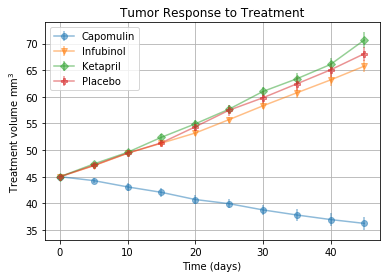

In [6]:
# Generate the Plot (with Error Bars)

# Store drug names to add to legend and cylce through
drug_names=mean_plot_data_df.columns

# Setup values for x axis
x_axis=vol_drg_ave_df['Timepoint'].unique().tolist()

# Initialize plot
fig, ax = plt.subplots() #figsize=(7,7)

# Set up marks to iterate through
import itertools
markers = itertools.cycle(('o', 'v', 'D', 'P', "*"))

# Add a plot for each drug
for drug_name in drug_names:
    standard_errors=sem_df[sem_df['Drug']==drug_name]['Standard Error'].tolist()
    means=mean_plot_data_df[drug_name].tolist()
    ax.errorbar(x_axis, means, standard_errors, fmt="o", capsize=None, ls="-", marker=next(markers), alpha=0.5, zorder=3)

# Add gridlines behind the plot
ax.grid(zorder=0)
# Setup legend and axis labels (put legend outside plot area)
ax.legend(drug_names, loc='best', ncol=1)
#ax.legend(drug_names, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
ax.set_xlabel("Time (days)")
# Superscript on lable
ax.set_ylabel("Treatment volume mm$^3$")
ax.set_title("Tumor Response to Treatment")

# Save the Figure
fig.savefig('Images/treatment.png', bbox_inches='tight')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

vol_st_gb=data_df[['Mouse ID','Timepoint','Metastatic Sites','Drug']].groupby(['Drug','Timepoint'], as_index=False)

vol_st_ave=vol_st_gb.mean()

# Convert to DataFrame

vol_st_ave_df=pd.DataFrame(vol_st_ave)

# Preview DataFrame

vol_st_ave_df.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Make new data frame to store Standard Error
sem_st_df=vol_st_ave_df[['Drug','Timepoint']]
# Initialize empty column to store values
sem_st_df['Standard Error']=""

# Convert to DataFrame

for j in range(0,len(sem_df)):
        sem_st_df.iloc[j, 2]=data_df[(data_df['Drug'] == sem_st_df.iloc[j, 0]) 
                                  & (data_df['Timepoint'] == sem_st_df.iloc[j, 1])]['Metastatic Sites'].sem()

# Preview DataFrame
sem_st_df.head(6)

,Drug,Timepoint,Standard Error
0,Capomulin,0,0
1,Capomulin,5,0.0748331
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818


In [9]:
# Minor Data Munging to Re-Format the Data Frames

mean_plot_data_st_df=vol_st_ave_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked

mean_plot_data_st_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


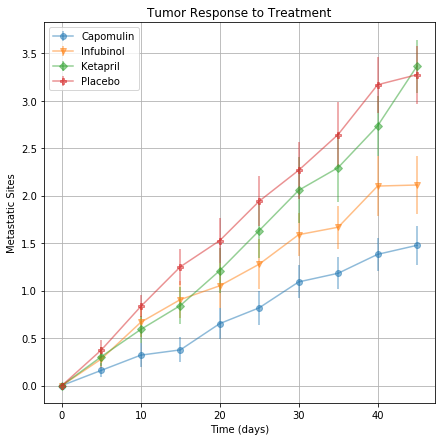

In [10]:
# Generate the Plot (with Error Bars)

# Store drug names to add to legend and cylce through
drug_names=mean_plot_data_st_df.columns

# Setup values for x axis
x_axis=vol_st_ave_df['Timepoint'].unique().tolist()

# Initialize plot
fig, ax = plt.subplots(figsize=(7,7))

# Set up marks to iterate through
import itertools
markers = itertools.cycle(('o', 'v', 'D', 'P', "*"))

for drug_name in drug_names:
    standard_errors=sem_st_df[sem_st_df['Drug']==drug_name]['Standard Error'].tolist()
    means=mean_plot_data_st_df[drug_name].tolist()
    ax.errorbar(x_axis, means, standard_errors, fmt="o", capsize=None, ls="-",
                marker=next(markers), alpha=0.5, zorder=3)

# Add gridlines behind the plot
ax.grid(zorder=0)
# Setup legend and axis labels (put legend outside plot area)
ax.legend(drug_names, loc='best', ncol=1)
#ax.legend(drug_names, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
ax.set_xlabel("Time (days)")
# Superscript on lable
ax.set_ylabel("Metastatic Sites")
ax.set_title("Tumor Response to Treatment")

# Save the Figure
fig.savefig('Images/spread.png', bbox_inches='tight')
# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

sur_gb=data_df[['Mouse ID','Timepoint','Drug']].groupby(['Drug','Timepoint'], as_index=False)

sur_ct=sur_gb.count()

# Convert to DataFrame

sur_ct_df=pd.DataFrame(sur_ct).rename(columns ={'Mouse ID' : 'Mouse Count'})

# Preview DataFrame
sur_ct_df.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Might be better to do crosstab?
# Minor Data Munging to Re-Format the Data Frames

sur_ct_plot_data_df=sur_ct_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')


# Preview the Data Frame
sur_ct_plot_data_df.head(5)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


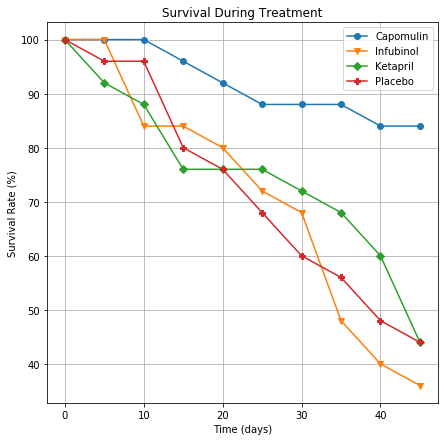

In [13]:
# Generate the Plot (Accounting for percentages)

# Store drug names to add to legend and cylce through
drug_names=sur_ct_plot_data_df.columns

# Setup values for x axis
x_axis=sur_ct_df['Timepoint'].unique().tolist()

# Initialize plot
fig, ax = plt.subplots(figsize=(7,7))

# Set up marks to iterate through
import itertools
markers = itertools.cycle(('o', 'v', 'D', 'P', "*"))

for drug_name in drug_names:
    percentages=sur_ct_plot_data_df[drug_name].tolist()
    percentages=[percent*100.0/percentages[0] for percent in percentages]
    ax.plot(x_axis, percentages, marker=next(markers), zorder=3)

# Add gridlines behind the plot
ax.grid(zorder=0)
# Setup legend and axis labels (put legend outside plot area)
ax.legend(drug_names, loc='best', ncol=1)
#ax.legend(drug_names, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
ax.set_xlabel("Time (days)")
# Superscript on lable
ax.set_ylabel("Survival Rate (%)")
ax.set_title("Survival During Treatment")

# Save the Figure
fig.savefig('Images/survival.png', bbox_inches='tight')
# Show the Figure
plt.show()

### Different Survival Plot

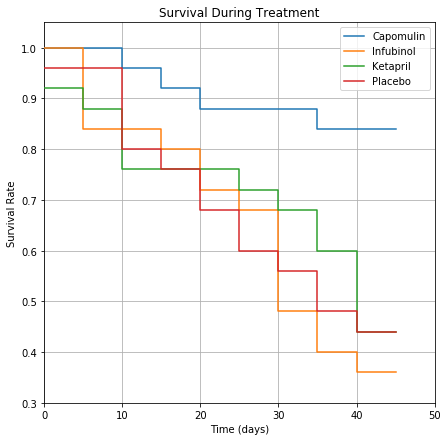

In [14]:
# Kaplan Meier curve - Was told to use this for survival plot
from lifelines import KaplanMeierFitter

# Initialize plot
fig, ax = plt.subplots(figsize=(7,7))

detailed_surv_df=data_df[['Mouse ID','Drug']]

# Set fitter
kmf = KaplanMeierFitter()

# Setup data and plot for each drug
for drug_name in drug_names:
    observation_time=[]
    mouse_alive=[]
    mice=data_df[data_df['Drug']==drug_name]['Mouse ID'].unique().tolist()
    obs_range=range(0,50,5)
    for mouse in mice:
        lifespan=len(detailed_surv_df[detailed_surv_df['Mouse ID']==mouse])
        observation_time.append(5*(lifespan-1))
        if lifespan<10:
            mouse_alive.append(True)
        else:
            mouse_alive.append(False)
    
    ## Fit the data into the model
    kmf.fit(observation_time, mouse_alive)

    ## Create an estimate
    kmf.plot_survival_function(ci_show=False, label=drug_name, zorder=3) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

# Add gridlines behind the plot
ax.grid(zorder=0)
# Set up labels and legend
ax.set_title("Survival During Treatment")
ax.legend(drug_names, loc='best', ncol=1)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate")
# Set plot extents
ax.set_xlim([0, 50])
ax.set_ylim([0.30, 1.05])

# Save the Figure
fig.savefig('Images/survival-Kaplan-Meier.png', bbox_inches='tight')
# Show the Figure
plt.show()


## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
index=len(mean_plot_data_df)-1

per_change=[100*(mean_plot_data_df.iloc[index,j]-mean_plot_data_df.iloc[0,j])
            /mean_plot_data_df.iloc[0,j] for j in range(0,4)]

per_chg_fmt=[f"{per:.2f}%" for per in per_change]

print(f"{per_change[0]:.2f}%")
# Display the data to confirm

pd.DataFrame.from_dict({'Drug' : drug_names , 'Percentages' : per_chg_fmt})


-19.48%


,Drug,Percentages
0,Capomulin,-19.48%
1,Infubinol,46.12%
2,Ketapril,57.03%
3,Placebo,51.30%


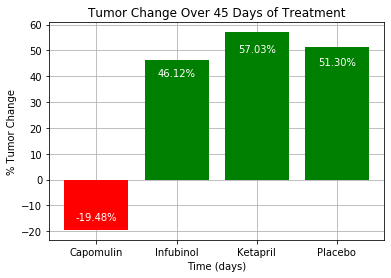

In [16]:
index=0

fig, ax = plt.subplots()
pos_per=[]
neg_per=[]
pos_name=[]
neg_name=[]

# Put gridlines behind plot
ax.grid(zorder=0)

# Adds each par to the plot and turns them different colors depending on the sign of 
# the percent change
for per in per_change:
    if per > 0:
        ax.bar([index], [per], align='center', color='green', zorder=3)
    else:
        ax.bar([index], [per], align='center', color='red', zorder=3)
    # Puts percentages into bars on graph.
    ax.text(index, 0.85*per, f"{per:0.2f}%",ha='center', va='bottom', color='white' , zorder=3)
    index+=1

# Add positions for drug name labels
x_pos = range(0,len(drug_names))
# Set up tick marks
plt.xticks(x_pos, drug_names)
# Add title and axis labels
plt.xlabel('Time (days)')
plt.ylabel('% Tumor Change')
plt.title('Tumor Change Over 45 Days of Treatment')

# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
fig.savefig('Images/change.png', bbox_inches='tight')
# Show the Figure
plt.show()